# Random Forest Classifier with pipeline and Hyperparameter Tuning

In [60]:
import seaborn as sns
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [38]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [41]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


In [42]:
df['day'].value_counts()

day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64

In [43]:
df['smoker'].value_counts()

smoker
No     151
Yes     93
Name: count, dtype: int64

In [44]:
df.duplicated().sum()

1

In [45]:
df.drop_duplicates(inplace=True)

In [46]:
df.duplicated().sum()

0

In [47]:
df['time'].value_counts()

time
Dinner    176
Lunch      67
Name: count, dtype: int64

# Visualization

In [62]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<Axes: xlabel='sex', ylabel='total_bill'>

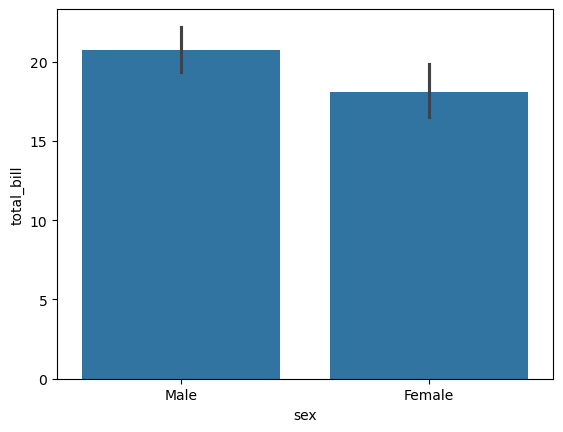

In [65]:
import matplotlib.pyplot as plt

sns.barplot(data=df, x='sex', y='total_bill')

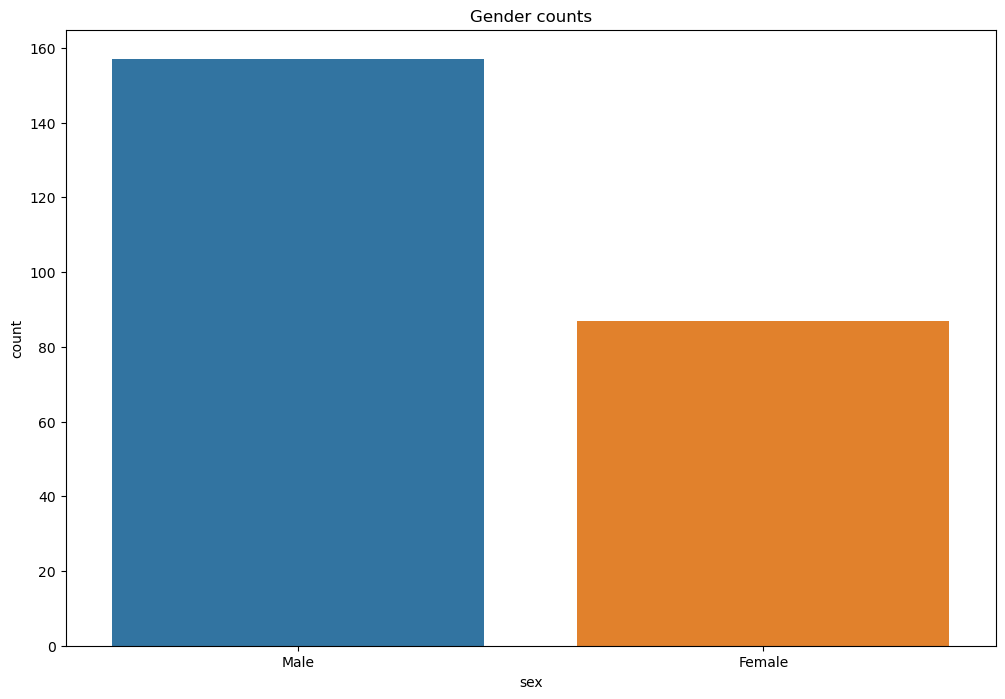

In [70]:
plt.figure(figsize=(12, 8))
sns.countplot(x='sex', data=df, hue='sex')
plt.title('Gender counts')
plt.show()

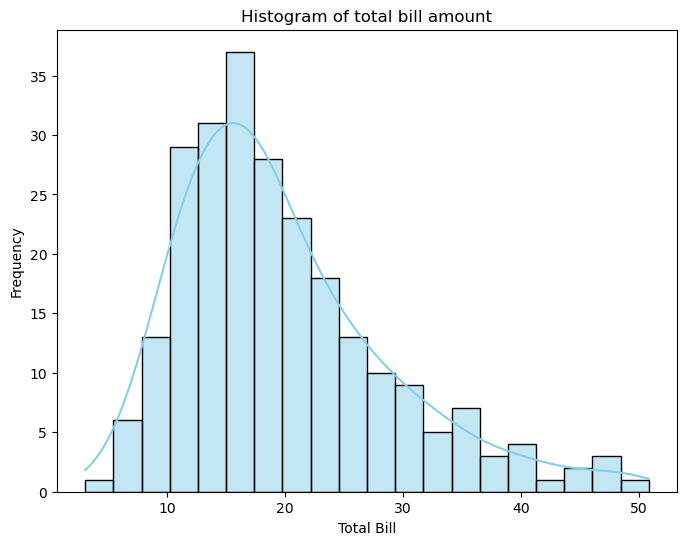

In [77]:
plt.figure(figsize=(8,6))
sns.histplot(df['total_bill'], bins=20, color='skyblue', edgecolor='black', kde=True)
plt.title('Histogram of total bill amount')
plt.xlabel('Total Bill')
plt.ylabel('Frequency')
plt.show()

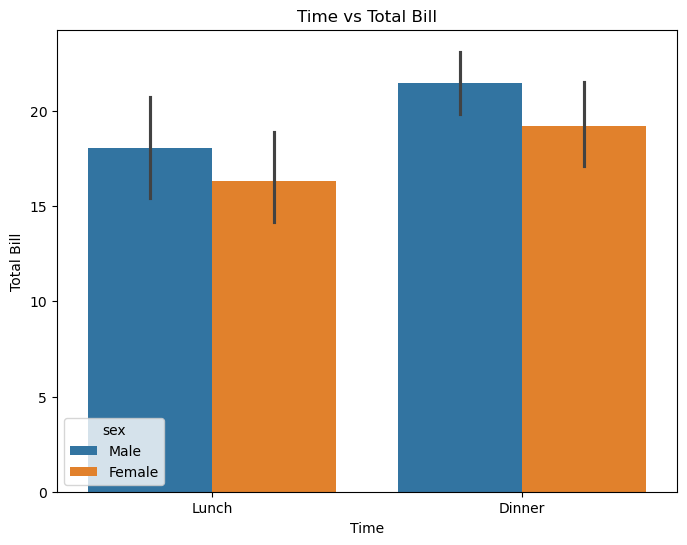

In [83]:
plt.figure(figsize=(8,6))
sns.barplot(data=df, x='time', y='total_bill', hue='sex')
plt.title('Time vs Total Bill')
plt.xlabel('Time')
plt.ylabel('Total Bill')
plt.show()

In [49]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['time'] = encoder.fit_transform(df['time'])

In [50]:
df['time'].unique()

array([0, 1], dtype=int64)

In [51]:
#Independent and dependent features
X = df.drop(labels=['time'], axis=1)

In [52]:
y = df.time

In [53]:
df['time'].value_counts()

time
0    176
1     67
Name: count, dtype: int64

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
from sklearn.pipeline import Pipeline 
from sklearn.impute import SimpleImputer  ##Handle Missing Values
from sklearn.preprocessing import StandardScaler  ##Feature Scaling
from sklearn.preprocessing import OneHotEncoder     ## Categorical to numerical
from sklearn.compose import ColumnTransformer

In [87]:
cate_col = df.select_dtypes(include=['object', 'category']).columns
num_col = df.select_dtypes(include=['int64', 'float'])

In [100]:
cate_col


Index(['sex', 'smoker', 'day', 'time'], dtype='object')

In [99]:
categorical_col = ['sex', 'smoker', 'day']
numerical_col = ['total_bill', 'tip', 'size']
